In [1]:
# Paso 1: Análisis exploratorio de datos
#cargar librerias
import pandas as pd #
import numpy as np #
import seaborn as sns #
import matplotlib.pyplot as plt #

#libresisas para implementae modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression #libreria para regresion lineal
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#lectura de datos cargando el dataset
cargar_archivo = pd.read_csv('./car details v3.csv')

In [3]:
#realizamos lectura de los datos
cargar_archivo.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [32]:
print("Información del dataset:")
cargar_archivo.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 7677 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7677 non-null   object 
 1   year           7677 non-null   int64  
 2   selling_price  7677 non-null   int64  
 3   km_driven      7677 non-null   int64  
 4   fuel           7677 non-null   object 
 5   seller_type    7677 non-null   object 
 6   transmission   7677 non-null   object 
 7   owner          7677 non-null   object 
 8   mileage        7677 non-null   object 
 9   engine         7677 non-null   object 
 10  max_power      7677 non-null   object 
 11  torque         7677 non-null   object 
 12  seats          7677 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 839.7+ KB


In [5]:
cargar_archivo.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
# Paso 2: Preprocesamiento de datos
# Tratar valores faltantes
cargar_archivo.dropna(inplace=True)

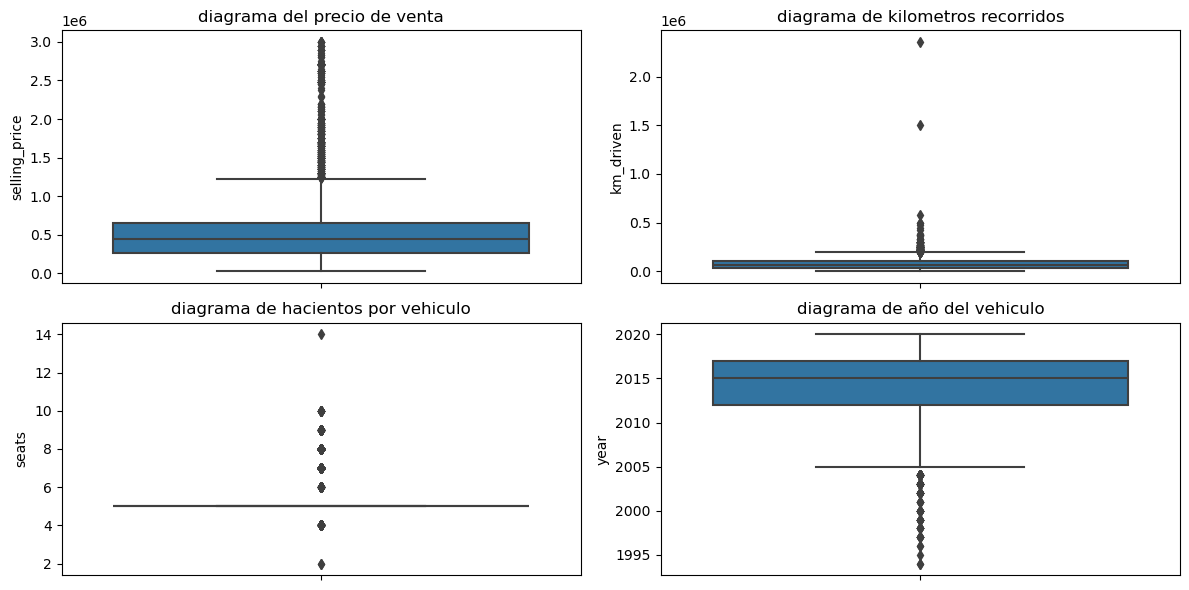

In [20]:
# Paso 3: Selección de características relevantes
# Detectar y tratar valores atípicos
# Vamos a visualizar las distribuciones de algunas variables importantes
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.boxplot(y=cargar_archivo['selling_price'])
plt.title('diagrama del precio de venta')

plt.subplot(2, 2, 2)
sns.boxplot(y=cargar_archivo['km_driven'])
plt.title('diagrama de kilometros recorridos')

plt.subplot(2, 2, 3)
sns.boxplot(y=cargar_archivo['seats'])
plt.title('diagrama de hacientos por vehiculo')

plt.subplot(2, 2, 4)
sns.boxplot(y=cargar_archivo['year'])
plt.title('diagrama de año del vehiculo')

plt.tight_layout()
plt.show()

In [8]:
# Calcular el límite superior e inferior utilizando la desviación estándar
std_dev = cargar_archivo['selling_price'].std()
mean_val = cargar_archivo['selling_price'].mean()
upper_limit = mean_val + 3 * std_dev
lower_limit = mean_val - 3 * std_dev

In [9]:
# Eliminar los valores atípicos
cargar_archivo = cargar_archivo[(cargar_archivo['selling_price'] < upper_limit) & (cargar_archivo['selling_price'] > lower_limit)]

In [21]:
# Revisar la información del dataset después de eliminar valores faltantes y atípicos
print("\nresultados del dataset después de eliminar valores faltantes y atípicos del precio de venta:")
print(cargar_archivo.info())


resultados del dataset después de eliminar valores faltantes y atípicos del precio de venta:
<class 'pandas.core.frame.DataFrame'>
Index: 7677 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7677 non-null   object 
 1   year           7677 non-null   int64  
 2   selling_price  7677 non-null   int64  
 3   km_driven      7677 non-null   int64  
 4   fuel           7677 non-null   object 
 5   seller_type    7677 non-null   object 
 6   transmission   7677 non-null   object 
 7   owner          7677 non-null   object 
 8   mileage        7677 non-null   object 
 9   engine         7677 non-null   object 
 10  max_power      7677 non-null   object 
 11  torque         7677 non-null   object 
 12  seats          7677 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 839.7+ KB
None


In [11]:
#se divide el trin y el test
# Seleccionar las variables independientes (atributos) y la variable dependiente (precio)
X = cargar_archivo['year']
#x = cargar_archivo.drop['km_driven']
Y = cargar_archivo['selling_price']

In [12]:
# Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

In [26]:
# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [33]:
# paso 5 Instanciar y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, Y_train)

LinearRegression()

In [34]:

# Realizar predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

In [35]:
# paso 6 se evalua el desempeño del modelo de prediccion
print("error cuadratico:", mean_squared_error(Y_test, y_pred))
print("error absoluto:", mean_absolute_error(Y_test, y_pred))
print("R cuadrado (R^2):", r2_score(Y_test, y_pred))

error cuadratico: 145137739399.72037
error absoluto: 222577.36070444688
R cuadrado (R^2): 0.2565439729231275


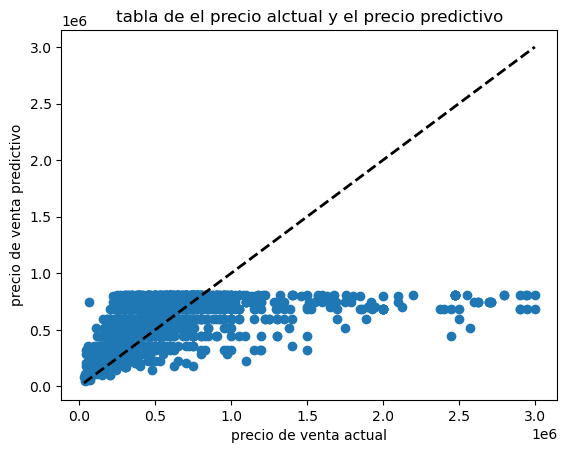

In [36]:
#paso 7 visualizamos los resultados en las grafica
plt.scatter(Y_test, y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # Línea de regresión
plt.xlabel("precio de venta actual")
plt.ylabel("precio de venta predictivo")
plt.title("tabla de el precio alctual y el precio predictivo")
plt.show()

In [1]:
# Paso 8: Interpretar, analizar y documentar los resultados obtenidos